In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.special import logit
from scipy.special import expit
import numpy as np

In [2]:
#Game set-up
p = 0.7
q = 0.4
# Without loss of generality, one can always use higher/lower alpha instead
u = 1 

# Initialization set-up
x_0 = 0.2
y_0 = 0.4

# Number of iterations
t = 40000

# Step size
alpha = 0.05

# list of iterates
xs = [x_0]
ys = [y_0]

# Discrete time update rule min player
def update_x(x,y):
    sigmoid_x = expit(x)
    der_x = sigmoid_x * (1-sigmoid_x)
    x_new = x - u * alpha * der_x * (expit(y)-q)
    return x_new

# Discrete time update rule max player
def update_y(x,y):
    sigmoid_y = expit(y)
    der_y = sigmoid_y * (1-sigmoid_y)
    y_new = y + u * alpha * der_y * (expit(x)-p)
    return y_new

for i in range(t):
    new_x = update_x(xs[-1], ys[-1])
    new_y = update_y(xs[-1], ys[-1])
    xs.append(new_x)
    ys.append(new_y)

In [3]:
def indefinite(x, p):
    first = (1-p)/(1-x)
    second = p/x
    third = (2*p-1)*np.log(1-x)
    fourth = (1-2*p)*np.log(x)
    return first + second + third+ fourth

def definite(x,p):
    return indefinite(x,p) - indefinite(p,p)

def hamiltonian(f,g, p, q):
    return definite(f,p) + definite(g,q)

def hamiltonian_x_y(x, y, p, q):
    fs = expit(x)
    gs = expit(y)
    return hamiltonian(fs, gs, p, q)

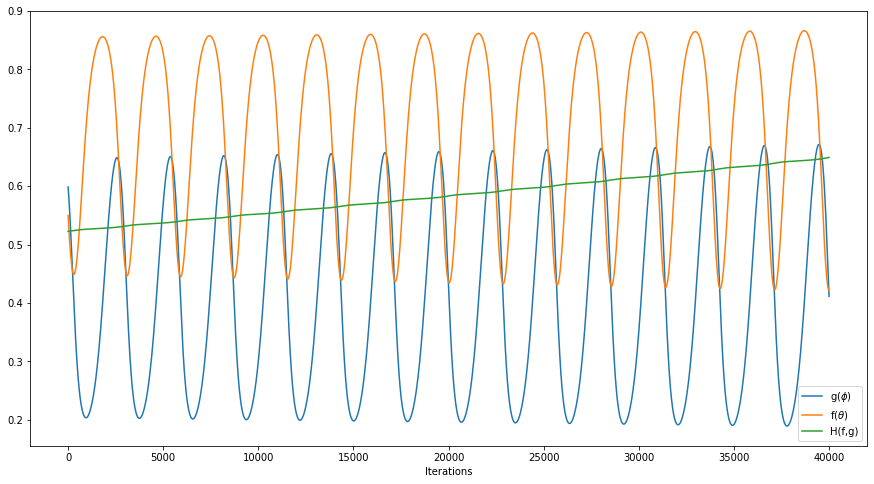

In [4]:
plt.figure(figsize=(15,8))
plt.plot(expit(ys), label = r'g($\phi$)')
plt.plot(expit(xs), label = r'f($\theta$)')
plt.plot(hamiltonian_x_y(xs, ys, p, q), label = 'H(f,g)')
plt.legend()
plt.xlabel('Iterations')
plt.savefig('figures/increasing_hamiltonian.pdf', bbox_inches = 'tight', dpi = 300)
plt.show()